<a href="https://colab.research.google.com/github/dhenriquedba/DataScience/blob/master/Data_Science_do_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capítulo 1 - Introdução
## Encontrando conectores-chave
Exibe lista de usuários, cada um representado por um id (numerico) e um name para cada usuário:

In [1]:
pip install python2

  Created wheel for python2: filename=python2-1.2-cp36-none-any.whl size=14505 sha256=2fc6681edfa4ee564e937ec0d3704e30abb1f4072c51b8377b6f644617ec1d6d
  Stored in directory: /root/.cache/pip/wheels/d1/6a/52/2ea03062735c314798c8c5ac3da63271888638d2f4fed6d4bd
Successfully built python2


In [2]:
users = [
         {"id": 0, "name": "Hero"},
         {"id": 1, "name": "Dunn"},
         {"id": 2, "name": "Sue"},
         {"id": 3, "name": "Chi"},
         {"id": 4, "name": "Thor"},
         {"id": 5, "name": "Clive"},
         {"id": 6, "name": "Hicks"},
         {"id": 7, "name": "Devin"},
         {"id": 8, "name": "Kate"},
         {"id": 9, "name": "Klein"}
]
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

Lista de dados "amigáveis", representados por uma lista de pares de IDs. Significa que o id 0 (Hero) e o ID 1 (Dunn) são amigos


In [3]:
friendships = [
               (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)
]
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [4]:
for user in users:
  user["friends"] = []

In [5]:
for i, j in friendships:
  #isso funciona porque users[i] é o usuário cujo id é [i]
  users[i]["friends"].append(users[j]) #adiciona o i como um amigo de j
  users[j]["friends"].append(users[i]) #adiciona o j como um amigo de i

In [6]:
def number_of_friends(user):
  #Quantos amigos o usuário tem?
  return len(user["friends"]) #tamanho da lista friends

In [7]:
total_connections = sum(number_of_friends(user) for user in users)

In [8]:
from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users

In [9]:
#cria uma lista (user_id, number_of_friends)
num_friends_by_id = [
                     (user["id"], number_of_friends(user))
                     for user in users
]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [10]:
sorted(num_friends_by_id,
      #key=lambda (user_id, num_friends): num_friends, o livro passa essa linha mas está retornando erro de sintaxe
      reverse=True)

[(9, 1),
 (8, 3),
 (7, 2),
 (6, 2),
 (5, 3),
 (4, 2),
 (3, 3),
 (2, 3),
 (1, 3),
 (0, 2)]

In [11]:
def friends_of_friend_ids_bad(user):
  # "foaf" é abreviação de "friend of a friend"
  return [foaf["id"]
          for friend in user["friends"]
          for foaf in friend[friends]]

In [12]:
users[0]

{'friends': [{'friends': [{...},
    {'friends': [{...},
      {...},
      {'friends': [{...},
        {...},
        {'friends': [{...},
          {'friends': [{...},
            {'friends': [{...},
              {'friends': [{...},
                {'friends': [{...}, {...}], 'id': 7, 'name': 'Devin'},
                {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
               'id': 8,
               'name': 'Kate'}],
             'id': 6,
             'name': 'Hicks'},
            {'friends': [{...},
              {'friends': [{'friends': [{...}, {...}],
                 'id': 6,
                 'name': 'Hicks'},
                {...},
                {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
               'id': 8,
               'name': 'Kate'}],
             'id': 7,
             'name': 'Devin'}],
           'id': 5,
           'name': 'Clive'}],
         'id': 4,
         'name': 'Thor'}],
       'id': 3,
       'name': 'Chi'}],
     'id': 2,
     'name': 'Sue'},
  

In [13]:
[friend["id"] for friend in users[0]["friends"]]
[friend["id"] for friend in users[1]["friends"]]
[friend["id"] for friend in users[2]["friends"]]

[0, 1, 3]

In [14]:
from collections import Counter

In [15]:
def not_the_same(user, other_user):
  return user["id"] != other_user["id"]

In [16]:
def not_friends(user, other_user):
  return all(not_the_same(friend, other_user)
        for friend in user["friends"])

In [17]:
def friends_of_friend_ids(user):
  return Counter(foaf["id"]
                 for friend in user["friends"]
                 for foaf in friend["friends"]
                 if not_the_same(user, foaf)
                 and not_friends(user, foaf))

In [18]:
friends_of_friend_ids(users[3])

Counter({0: 2, 5: 1})

In [19]:
interests =  [
              (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
              (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
              (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
              (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
              (2, "numoy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
              (3, "statistics"), (3, "regression"), (3, "probability"),
              (4, "machine learning"), (4, "regression"), (4, "decision trees"),
              (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
              (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
              (6, "probability"), (6, "mathematics"), (6, "theory"),
              (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
              (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
              (8, "Big Data"), (8, "artificial inteligence"), (9, "Hadoop"),
              (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [20]:
def data_scientists_who_like(target_interest):
  return [user_id
          for user_id, user_interest in interests
          if user_interest == target_interest]

In [21]:
#A lista funciona, mas a lista de interesses inteira é examinada a cada busca. 
data_scientists_who_like("machine learning")

[4, 7]

In [22]:
from collections import defaultdict

In [23]:
#as chaves são interesses, os valores são listas de user_ids com interests
user_ids_by_interest = defaultdict(list)

In [24]:
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

In [25]:
#as chaves são user_ids, os valores são as listas ded interests para aquele user_id
interests_by_user_id = defaultdict(list)

In [26]:
for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [27]:
def most_common_interest_with(user):
  return Counter(interested_user_id
                 for interest in interests_by_user_id[user["id"]]
                 for interests_by_user_id in user_ids_by_interest[interest]
                 if interested_user_id != user["id"])

##Salários e Experiência

In [28]:
#Relação de salários x anos de experiencia (salario, anos_experiencia)
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [29]:
#as chaves são os anos, os valores são as listas dos salários para cada ano
salary_by_tenure = defaultdict(list)

In [30]:
for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

In [31]:
#as chaves são os anos, cada valor é a média salarial para aquele ano 
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [32]:
average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [33]:
#agrupando os casos
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [34]:
salary_by_tenure_bucket = defaultdict(list)

In [35]:
#junta os salarios correspondentes para cada agrupamento
for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

In [36]:
#computa a media salarial para cada grupo
avarage_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [37]:
avarage_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

In [38]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

In [39]:
predict_paid_or_unpaid(1)

'paid'

In [40]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numoy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial inteligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [41]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [42]:
for word, count in words_and_counts.most_common():
                                                if count > 1:
                                                  print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


#Capítulo 2 - Curso Relâmpago de Python
##O básico - pág 15

In [43]:
!python2 --version

Python 2.7.17


In [44]:
for i in [1, 2, 3, 4, 5]:
  print(i)
  for j in [1, 2, 3, 4, 5]:
    print(j)
    print(i + j)
  print(i)
print("done looping")


1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
done looping


In [45]:
long_winded_computation = (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20)
long_winded_computation

210

In [46]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [47]:
easier_to_read_list_of_lists = [ [1, 2, 3],
                                 [4, 5, 6],
                                 [7, 8, 9]
]
easier_to_read_list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [48]:
two_plus_three = 2 + \
                 3
two_plus_three

5

In [49]:
import re

In [50]:
my_regex = re.compile("[0-9]+", re.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

In [51]:
import matplotlib.pyplot as plt

In [52]:
from collections import defaultdict, Counter

In [53]:
lookup = defaultdict(int)
lookup

defaultdict(int, {})

In [54]:
my_counter = Counter()
my_counter

Counter()

In [55]:
match = 10
match

10

In [56]:
from re import *
match

<function re.match>

In [57]:
from __future__ import division

In [58]:
5/2

2.5

In [59]:
def double(x):
  return x * 2

In [60]:
double(5)

10

In [61]:
def apply_to_one(f):
  return f(1)

In [62]:
my_double = double
x = apply_to_one(my_double)
x

2

In [63]:
y = apply_to_one(lambda x: x + 4)
y

5

In [64]:
another_double = lambda x: x + 2
another_double

<function __main__.<lambda>>

In [65]:
def another_double(x):
  return 2 * x

In [66]:
another_double(2)

4

In [67]:
def my_print(message= "my default message"):
  print(message)

In [68]:
my_print("hello")

hello


In [69]:
my_print()

my default message


In [70]:
def subtract(a=0, b=0):
  return a - b

In [71]:
subtract(10, 5)

5

In [72]:
single_quoted_string = 'data science'
single_quoted_string

'data science'

In [73]:
double_quoted_string = "data science"
double_quoted_string

'data science'

In [74]:
tab_string = "\t"
tab_string

'\t'

In [75]:
len(tab_string)

1

In [76]:
not_tab_string = r"\t"
not_tab_string

'\\t'

In [77]:
len(not_tab_string)

2

In [78]:
multi_line_string = """esta é a primeira linha
 e esta é a segunda
 e esta é a terceira"""

In [79]:
multi_line_string

'esta é a primeira linha\n e esta é a segunda\n e esta é a terceira'

In [80]:
try:
  print (0 / 0)
except ZeroDivisionError:
  print ("cannot divide by zero")

cannot divide by zero


In [81]:
integer_list = [1, 2, 3]
integer_list

[1, 2, 3]

In [82]:
heterogeneous_list = ["string", 0.1, True]
heterogeneous_list

['string', 0.1, True]

In [83]:
list_of_lists = [integer_list, heterogeneous_list, []]
list_of_lists

[[1, 2, 3], ['string', 0.1, True], []]

In [84]:
list_length = len(integer_list)
list_length

3

In [85]:
list_sum = sum(integer_list)
list_sum

6

In [86]:
x = range(10)
x

range(0, 10)

In [87]:
zero = x[0]
zero

0

In [88]:
one = x[1]
one

1

In [89]:
nine = x[-1]
nine

9

In [90]:
eight = x[-2]
eight

8

In [91]:
first_three = x[:3]
first_three

range(0, 3)

In [92]:
three_to_end = x[3:]
three_to_end

range(3, 10)

In [93]:
one_to_four = x[1:5]
one_to_four

range(1, 5)

In [94]:
last_three = x[-3:]
last_three

range(7, 10)

In [95]:
without_first_and_last = x[1:-1]
without_first_and_last

range(1, 9)

In [96]:
copy_of_x = x[:]
copy_of_x

range(0, 10)

In [97]:
1 in [1, 2, 3]

True

In [98]:
0 in [1, 2, 3]

False

In [99]:
x = [1, 2, 3]
x

[1, 2, 3]

In [100]:
x.extend([4, 5, 6])
x

[1, 2, 3, 4, 5, 6]

In [101]:
x = [1, 2, 3]
x

[1, 2, 3]

In [102]:
y = x + [4, 5, 6]
y

[1, 2, 3, 4, 5, 6]

In [103]:
x.append(0)
x

[1, 2, 3, 0]

In [104]:
y = x[-1]
y

0

In [105]:
z = len(x)
z

4

In [106]:
x, y = [1, 2]

In [107]:
x

1

In [108]:
y

2

In [109]:
_, y = [1, 2]

In [110]:
my_list = [1, 2]

In [111]:
my_tuple = (1, 2)

In [112]:
other_tuple = 3,4

In [113]:
my_list[1] = 3

In [114]:
try:
  my_tuple[1] = 3
except TypeError:
  print("cannot modify a tuple")

cannot modify a tuple


In [115]:
def sum_and_product(x, y):
  return (x + y), (x * y)

In [116]:
sp = sum_and_product(2, 3)
sp

(5, 6)

In [117]:
s, p = sum_and_product(5, 10)

In [118]:
s

15

In [119]:
p

50

In [120]:
x, y = 1, 2

In [121]:
x

1

In [122]:
y

2

In [123]:
x, y = y, x

In [124]:
x

2

In [125]:
y

1

#Capítulo 3 - Visualizando dados
## Matplotlib

In [126]:
from matplotlib import pyplot as plt

In [127]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [128]:
gdp = [300.2, 543.3, 1075.9, 2862.5, 5079.6, 10289.7, 14958.3]

<function matplotlib.pyplot.show>

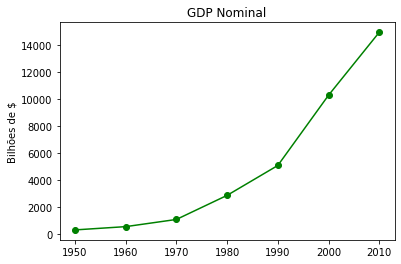

In [129]:
#cria grafico de linha, anos no eixo x, gdp no eixo y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
#adiciona um título
plt.title("GDP Nominal")

#adiciona um selo no eixo y
plt.ylabel("Bilhões de $")
plt.show

In [130]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gangdhi", "West Side Story"]

In [131]:
num_oscars = [5, 11, 3, 8, 10]

In [132]:
xs = [i + 0.1 for i, _ in enumerate(movies)]

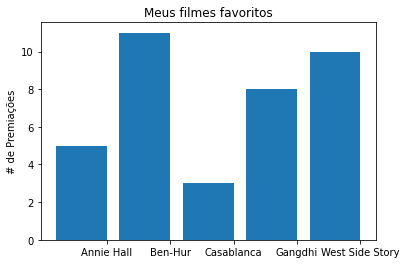

In [133]:
plt.bar(xs, num_oscars)
plt.ylabel("# de Premiações")
plt.title("Meus filmes favoritos")
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

In [134]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [135]:
decile = lambda grade: grade // 10 * 10

In [136]:
from collections import Counter

In [137]:
histogram = Counter(decile(grade) for grade in grades)

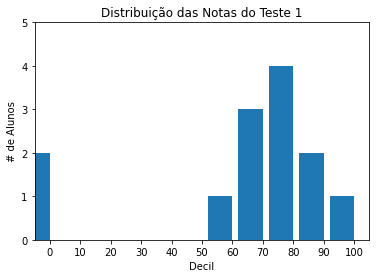

In [138]:
 plt.bar([ x - 4 for x in histogram.keys()],
         histogram.values(),
         8)
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])
plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Distribuição das Notas do Teste 1")
plt.show()

In [139]:
mentions = [500, 505]
years = [2013, 2014]

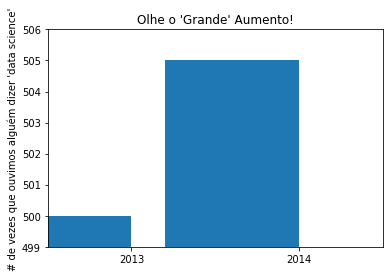

In [140]:
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5, 2014.5, 499, 506])
plt.title("Olhe o 'Grande' Aumento!")
plt.show()

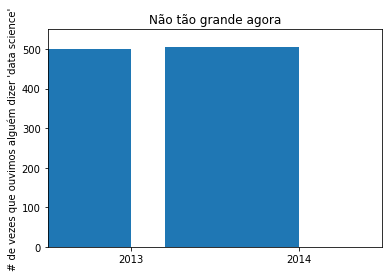

In [141]:
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2012.5, 2014.5, 0, 550])
plt.title("Não tão grande agora")
plt.show()

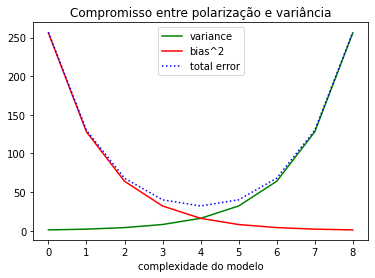

In [142]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9)
plt.xlabel("complexidade do modelo")
plt.title("Compromisso entre polarização e variância")
plt.show()

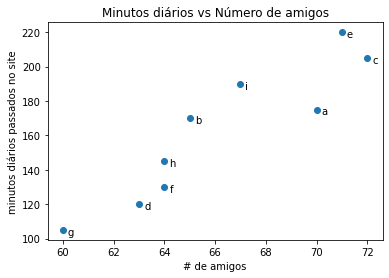

In [143]:
friends = [70, 65 , 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
               xy = (friend_count, minute_count),
               xytext = (5, -5),
               textcoords = 'offset points')
  
plt.title("Minutos diários vs Número de amigos")

plt.xlabel("# de amigos")
plt.ylabel("minutos diários passados no site")
plt.show()

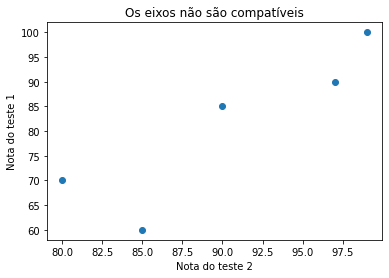

In [144]:
text_1_grades = [99, 90, 85, 97, 80]
text_2_grades = [100, 85, 60, 90, 70]

plt.scatter(text_1_grades, text_2_grades)
plt.title("Os eixos não são compatíveis")
plt.xlabel("Nota do teste 2")
plt.ylabel("Nota do teste 1")
plt.show()

#Capítulo 4 - Álgebra Linear
Vetores

Os vetores são objetos que podem ser somados juntos (para formar vetores novos) e que podem ser multiplicados pelos escalares (por exemplo, números), também para formar vetores novos. Os vetores são pontos em algum espaço de dimensão finita.

Usar listas para vetores é bom para a exposição, mas terrível para o desempenho.
Na produção de código, você pode usar a biblioteca NumPu, que inclui uma classe de array de alta performance com todos os tipos de operações matemáticas inclusas.

Matrizes

Uma matriz é uma coleção de números bidimensional. Representaresmos matrizes como listas de listas, com cada lista interior possuindo o mesmo tamanho e representando uma linha da matriz.

Na matemática normalmente nomearíamos a primeira linha da matriz de "linha 1" e a primeira coluna de "coluna 1". Já que estamos representando matrizes com as listas de python, que são indexadas em zero, chamaremos a primeira linha de "linha 0" e a primeira coluna de "coluna 0".

In [145]:
#Uma lista de três números corresponde a um vetor em um espaço tridimensional, e vice-versa
height_weight_age = [70, # polegadas
                     170, # quilos
                     40 # anos
                     ]
height_weight_age

[70, 170, 40]

In [146]:
grades = [95, # teste1
          80, # teste2
          75, # teste3
          62 # teste4
          ]
grades        

[95, 80, 75, 62]

In [147]:
def vector_add(v, w):
  """soma elementos correspondentes"""
  return [v_i + w_i
          for v_i, w_i in zip(v, w)]

In [148]:
def vector_subtract(v, w):
  """subtrai elementos correspondentes"""
  return [v_i - w_i
          for v_i, w_i in zip(v, w)]

In [149]:
def vector_sum(vectors):
  """soma todos elementos correspondentes"""
  result = vectors[0] # começa com o primeiro vetor
  for vector in vectors[1:]: # depois passa por todos os outros
    result = vector_add(result, vector) # e os adiciona ao resultado
  return result

In [150]:
def vector_sum(vectors):
  return reduce(vector_add, vectors)

In [151]:
def scalar_multiply(c, v):
  """c é um número, v é um vetor"""
  return [c * v_i for v_i in v]

In [152]:
 def vector_mean(vectors):
   """computar o vetor cujo i-ésimo elemento seja a média  dos 
   i-ésimos elementos dos vetores inclusos"""
   n = len(vectors)
   return scalar_multiply(1/n, vector_sum(vectors))

In [153]:
def dot(v, w):
  """v_1 * w_1 + ... v_n * w_n"""
  return sum(v_i * w_i
             for v_i, w_i in zip(v, w))

In [154]:
def sum_of_squares(v):
  """v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

In [155]:
import math
def magnitude(v):
  return math.sqrt(sum_of_squares(v)) # math.sqrt é a função de raiz quadrada

In [156]:
def squared_distance(v, w):
  """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
  return (sum_of_squares(vector_subtract(v, w)))

In [157]:
def distance(v, w):
  return math.sqrt(squared_distance(v, w))

In [158]:
def distance(v, w):
  return magnitude(vector_subtract(v, w))

In [159]:
A = [[1, 2, 3], # A possui duas linhas e três colunas
     [4, 5, 6]
     ]

In [160]:
B = [[1, 2], # B possui três linhas e duas colunas 
     [3, 4],
     [5, 6]
     ]

In [161]:
def shape(A):
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0 # número de elementos na primeira linha
  return num_rows, num_cols

In [162]:
def get_row(A, i):
  return A[i] # A[i] já é da linha é a linha i-ésimo

In [163]:
def get_column(A, j):
  return [A_i[j] # j-ésimo elemento da linha A_i
          for A_i in A] # para cada linha A_i

In [164]:
def make_matrix(num_rows, num_cols, entry_fn):
  """retorna a matriz num_rows x num_cols
  cuja entrada (i, j)th é entry_fn(i, j)"""
  return [[entry_fn(i, j) # dado i, cria uma lista
  for j in range(num_cols)] # [entry_fn(i, 0), ...]
  for i in range(num_rows)] # cria uma lista para cada i

In [165]:
def is_diagonal(i, j):
  """i's na diagonal, 0's nos demais lugares"""
  return 1 if i == j else 0

In [166]:
friends_of_five = [i # somente precisamos 
                   for i, is_friend in enumerate(friendships[5]) # olhar para
                   if is_friend] # uma linha

#Capítulo 5 - Estatística
Os fatos são teimosos, mas as estatísticas são mais maleáveis - Mark Twain

A estatística se refere à matemática e às técnicas com as quais entendemos os dados.

In [167]:
num_friends = [100, 49, 41, 40, 25, 20, 19, 18, 17, 16,
               2, 1, 1, 3, 10, 20, 12, 1, 9, 1,
               2, 1, 5, 3, 10, 2, 13, 1, 9, 2,
               3, 1, 1, 2, 10, 2, 14, 1, 9, 3,
               3, 1, 6, 6, 10, 2, 14, 1, 9, 4,
               4, 1, 6, 7, 6, 2, 14, 1, 9, 5,
               4, 1, 1, 7, 6, 2, 14, 4, 9, 4,
               5, 1, 4, 7, 10, 2, 15, 3, 8, 7,
               5, 1, 4, 7, 6, 2, 15, 3, 8, 8,
               6, 6, 4, 7, 6, 2, 6, 2, 10, 9,
               6, 6, 4, 7, 6, 2, 5, 11, 10, 1,
               7, 6, 4, 8, 11, 3, 6, 8, 10, 2,
               7, 6, 4, 8, 11, 3, 6, 8, 10, 3,
               8, 6, 4, 8, 11, 3, 15, 6, 10, 4,
               8, 6, 4, 8, 11, 3, 15, 8, 10, 5,
               9, 6, 4, 8, 11, 3, 15, 4, 1, 3,
               9, 6, 4, 8, 11, 4, 5, 12, 2, 7,
               10, 6, 1, 8, 12, 4, 5, 13, 3, 8,
               10, 6, 1, 9, 12, 4, 5, 14, 4, 9,
               11, 6, 1, 9, 12, 4, 5, 2, 5, 1,
               11, 1, 1, 9]

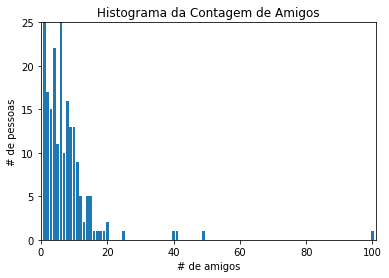

In [168]:
friend_counts = Counter(num_friends)
xs = range(101) # o valor maior é 100
ys = [friend_counts[x] for x in xs] # a altura é somente # de amigos
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histograma da Contagem de Amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()

In [169]:
num_points = len(num_friends)
num_points

204

In [170]:
largest_value = max(num_friends)
largest_value

100

In [171]:
smallest_value = min(num_friends)
smallest_value

1

In [172]:
sorted_values = sorted(num_friends)
sorted_values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 17,
 18,
 19,
 20,
 20,
 25,
 40,
 41,
 49,
 100]

In [173]:
smallest_value = sorted_values[0]
smallest_value

1

In [174]:
second_smallest_value = sorted_values[1]
second_smallest_value

1

In [175]:
second_largest_value = sorted_values[-2]
second_largest_value

49

In [176]:
# não está certo se você não importar a divisão de __future__
from __future__ import division

In [177]:
def mean(x):
  return sum(x) / len(x)

In [178]:
mean(num_friends)

7.534313725490196

In [179]:
def median(v):
  """encontra o valor mais ao meio de v"""
  n = len(v)
  sorted_v = sorted(v)
  midpoint = n // 2

  if n % 2 == 1:
    # se for impar, retorna o valor do meio
    return sorted_v[midpoint]
  else:
    # se for par, retorna a média dos valores do meio
    lo = midpoint -1
    hi = midpoint
    return (sorted_v[lo] + sorted_v[hi]) / 2

In [180]:
median(num_friends)

6.0

In [181]:
def quantile(x, p):
  """retorna o percentual p-ésimo em x"""
  p_index = int(p * len(x))
  return sorted(x)[p_index]


In [182]:
quantile(num_friends, 0.10)

1

In [183]:
quantile(num_friends, 0.25)

3

In [184]:
quantile(num_friends, 0.75)

9

In [185]:
quantile(num_friends, 0.90)

14

In [186]:
# Importei o collections para utilizar o Counter
import collections

In [187]:
def mode(x):
  """retorna uma lista, pode haver mais de uma moda"""
  counts = Counter(x)
  max_count = max(counts.values())
  # return [x_i for x_i, count in counts.iteritems() 
  # alterei o código do livro pelo abaixo para mostrar os valores mais comuns em python 2
  return [x_i for x_i, count in counts.most_common()
  if count == max_count]

In [188]:
mode(num_friends)

[1, 6]

In [189]:
# "amplitude" já possui um significado em Python, então usaremos um nome diferente
def data_range(x):
  return max(x) - min(x)

In [190]:
data_range(num_friends)

99

In [191]:
def de_mean(x):
  """desloca x ao subtrair sua média (então o resultado tem a média 0)"""
  x_bar = mean(x)
  return [x_i - x_bar for x_i in x]

In [192]:
def variance(x):
  """presume que x tem ao menos dois elementos"""
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)

In [193]:
variance(num_friends)

81.92492514247068

In [194]:
def standard_deviation(x):
  return math.sqrt(variance(x))

In [195]:
standard_deviation(num_friends)

9.051238873351576

In [196]:
def interquartile_range(x):
  return quantile(x, 0.75) - quantile(x, 0.25)

In [197]:
interquartile_range(num_friends)

6

In [198]:
def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)

In [199]:
covariance(num_friends, minutes)

7.876299945265456

In [200]:
def correlation(x, y):
  stdev_x = standard_deviation(x)
  stdev_y = standard_deviation(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return 0 # se não houver amplitude, a correlação é zero

In [201]:
correlation(num_friends, minutes)

0.021965507733269555

In [202]:
outlier = num_friends.index(100)

In [203]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

In [204]:
daily_minutes_good = [x
                      for i, x in enumerate(minutes)
                      if i != outlier]

In [205]:
correlation(num_friends_good, daily_minutes_good)

0.012821514310882976

#Capítulo 6 - Probabilidade
As leis da probabilidade, no geral tão verdadeiras, no particular tão enganosas - Edward Gibbon

A probabilidade é uma forma de quantificar a incerteza associada a eventos escolhidos a partir de um universo deles.

##Probabilidade Condicional
Quando dois eventos E e F são independentes (e a probabilidade de F não for 0), logo definimos a probabilidade e E "condicionada a F" assim: 

P(E,F) = P(E)P(F)

Se não são necessariamente independentes (e a probabilidade de F não for 0), logo definimos a probabilidade de E "condicionada" a F assim:

P(E|F) = P(E,F)/P(F)

In [206]:
def random_kid():
  return random.choice(["boy", "girl"])

In [207]:
both_girls = 0
older_girl = 0
either_girl = 0

In [208]:
import random

In [209]:
random.seed(0)
for _ in range(10000):
  younger = random_kid()
  older = random_kid()
  if older == "girl":
    older_girl += 1
  if older == "girl" and younger == "girl":
    both_girls += 1
  if older == "girl" or younger == "girl":
    either_girl += 1

In [210]:
"P(both | older):", both_girls / older_girl

('P(both | older):', 0.5007089325501317)

In [211]:
"P(both | eigther):", both_girls / either_girl

('P(both | eigther):', 0.3311897106109325)

In [212]:
def uniform_pdf(x):
  return 1 if x >= 0 and x < 1 else 0

In [213]:
uniform_pdf(random.random())

1

In [214]:
def uniform_cdf(x):
  """retorna a probabilidade de uma variável aleatória uniforme ser <= x"""
  if x < 0:
    return 0 # a aleatória uniforme nunca é menor que 0
  elif x < 1:
    return x # por exemplo P(x <= 0.4) = 0.4
  else:
    return 1 # a aleatória uniforme sempre é menor do que 1

In [215]:
uniform_cdf(random.random())

0.29046802524618587

In [216]:
def normal_pdf(x, mu=0, sigma=1):
  sqrt_two_pi = math.sqrt(2 * math.pi)
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

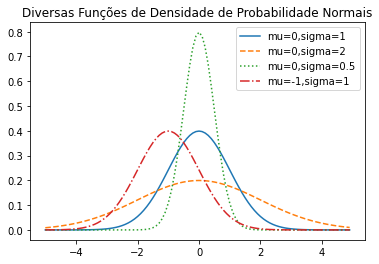

In [217]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Diversas Funções de Densidade de Probabilidade Normais")
plt.show()

In [218]:
def normal_cdf(x, mu=0, sigma=1):
  return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

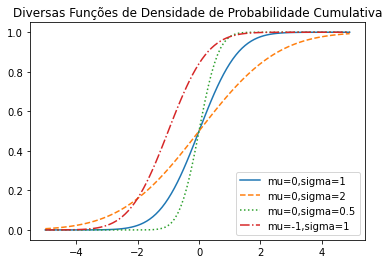

In [219]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Diversas Funções de Densidade de Probabilidade Cumulativa")
plt.show()

In [220]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
  """encontra o inverso mais próximo usando a busca binária"""
  #se não for padrão, computa o padrão e redimensiona
  if mu != 0 or sigma != 1:
    return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

  low_z, low_p = -10.0, 0 # normal_cdf(-10) está (muito perto de) 0
  hi_z, hi_p = 10.0, 1    # normal_cdf(10) está (muito perto de) 1
  while hi_z - low_z > tolerance:
    mid_z = (low_z + hi_z) / 2 # considera o valor do meio e o valor da
    mid_p = normal_cdf(mid_z) # função da distribuição cumulativa lá
    if mid_p < p:
      # o ponto do meio ainda está baixo, procura acima
      low_z, low_p = mid_z, mid_p
    elif mid_p > p:
      # o ponto do meio ainda está alto, procura abaixo
      hi_z, hi_p = mid_z, mid_p
    else:
      break

  return mid_z

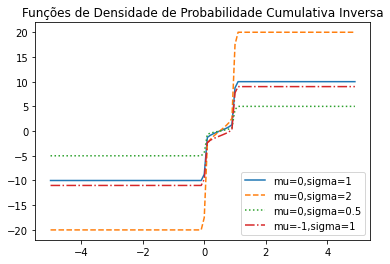

In [221]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs,[inverse_normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[inverse_normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Funções de Densidade de Probabilidade Cumulativa Inversa")
plt.show()

In [222]:
def bernoulli_trial(p):
  return 1 if random.random() < p else 0

In [223]:
def binomial(n, p):
  return sum(bernoulli_trial(p) for _ in range(n))

In [224]:
def make_hist(p, n, num_points):
  data = [binomial(n, p) for _ in range(num_points)]

  # usa um gráfico de barras para exibir as amostras binomiais atuais
  histogram = Counter(data)
  plt.bar([x - 0.4 for x in histogram.keys()],
          [v / num_points for v in histogram.values()],
          0.8,
          color='0.75')
  
  mu = p * n 
  sigma = math.sqrt(n * p * (1 - p))

  # usa um gráfico de linhas para exibir uma aproximação da normal
  xs = range(min(data), max(data) + 1)
  ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
        for i in xs]
  plt.plot(xs, ys)
  plt.title("Distribuição Binomial vs. Aproximação Normal")
  plt.show()

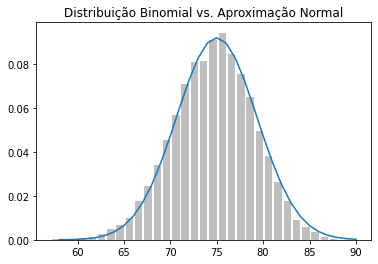

In [225]:
make_hist(0.75, 100, 10000)

#Capítulo 7 - Hipótese e Interferência
É característica de uma pessoa realmente inteligente ser movida pela estatística. - George Bernard Shaw

O que faremos com todas essas teorias de estatísticas e probabilidade? A parte da ciência de data science frequentemente envolve formar e testar hipóteses sobre nossos dados e os processos que os geram.

In [226]:
def normal_approximation_to_binomial(n, p):
  """encontra mi e sigma correspondendo ao Binomial(n, p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [227]:
# o cdf normal é a probabilidade que a variável esteja abaixo de um limite
normal_probability_below = normal_cdf


In [228]:
# está acima do limite se não estiver abaixo
def normal_probability_above(lo, mu=0, sigma=1):
  return 1 - normal_cdf(lo, mu, sigma)

In [230]:
# está entre se for menos do que hi mas não menor que lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
  return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

In [231]:
# está fora se não estiver entre
def normal_probability_outside(lo, hi, mu=0, sigma=1):
  return 1 - normal_probability_between(lo, hi, mu, sigma)

In [237]:
def normal_upper_bound(probability, mu=0, sigma=1):
  """retorna z para que p(Z <= z) = probability"""
  return inverse_normal_cdf(probability, mu, sigma)

In [238]:
def normal_lower_bound(probability, mu=0, sigma=1):
  """retorna z para que p(Z >= z) = probability"""
  return inverse_normal_cdf(1 - probability, mu, sigma)

In [241]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
  """retorna os limites simétricos (sobre a média)
  que contém a probabilidade específica"""
  tail_probability = (1 - probability) / 2

  # limite superior deveria ter tail_probability acima
  upper_bound = normal_lower_bound(tail_probability, mu, sigma)

  # limite inferior deveria ter tail_probability abaixo
  lower_bound = normal_upper_bound(tail_probability, mu, sigma)

  return lower_bound, upper_bound

In [250]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

In [251]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)